## **Covid Analysis of 20 Countries**
Time period taken:  **15-Feb-2020**   to **05-Jul-2021**

In this notebook things performed are:



*   Complete analysis of top 20 countries.
*   Day wise analysis of each country(20 countries).





In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Installation of some required interactive plotting libraries
!pip install plotly
!pip install cufflinks
!pip install chart_studio

     |████████████████████████████████| 64 kB 1.7 MB/s 


In [ ]:
#Importing libraries
import os
import pandas as pd
import seaborn as sns
import itertools 
import missingno as msn
from collections  import Counter
import matplotlib.pyplot as plt
import chart_studio.plotly as py
import cufflinks as cf
import plotly.express as px
import plotly.graph_objects as go
import warnings
warnings.filterwarnings("ignore")

In [ ]:
#loading complete world's date day-wise
Cov_daywise_data = pd.read_csv('/content/drive/MyDrive/Techies/Covid_analysis/Dataset/COV_daywise_dataset.csv')
Cov_daywise_data.head(10)

,Date,Country/Region,Confirmed,Recovered,Deaths
0,1/22/2020,Afghanistan,0,0.0,0
1,1/23/2020,Afghanistan,0,0.0,0
2,1/24/2020,Afghanistan,0,0.0,0
3,1/25/2020,Afghanistan,0,0.0,0
4,1/26/2020,Afghanistan,0,0.0,0
5,1/27/2020,Afghanistan,0,0.0,0
6,1/28/2020,Afghanistan,0,0.0,0
7,1/29/2020,Afghanistan,0,0.0,0
8,1/30/2020,Afghanistan,0,0.0,0
9,1/31/2020,Afghanistan,0,0.0,0


The dataset shown above is carrying the time-series data of all countries till 8-july-2021. We'll analyse the top 20 covid affected countries from 15-Feb-2020 till 5-july-2021

### **Data Preparation**
Obtaining the required set of data with top 20 covid affected countries.

In [ ]:
#Getting countries name from dataset
countries = [i for i in Cov_daywise_data['Country/Region']]
countries = Counter(countries)
print('-------------Countries along with sample count of data----------------')
print(countries)

#Formatting date to datetime format
Cov_daywise_data.Date = pd.to_datetime(Cov_daywise_data.Date)

#Fetching data from 15/02/2020 to 06/07/2021
Cov_daywise_data = Cov_daywise_data[Cov_daywise_data['Date']<'07-06-2021']
Cov_daywise_data = Cov_daywise_data[Cov_daywise_data['Date']>='15-02-2020']

-------------Countries along with sample count of data----------------
Counter({'China': 18156, 'Canada': 8544, 'France': 6408, 'United Kingdom': 6408, 'Australia': 4272, 'Netherlands': 2670, 'Denmark': 1602, 'New Zealand': 1068, 'Afghanistan': 534, 'Albania': 534, 'Algeria': 534, 'Andorra': 534, 'Angola': 534, 'Antigua and Barbuda': 534, 'Argentina': 534, 'Armenia': 534, 'Austria': 534, 'Azerbaijan': 534, 'Bahamas': 534, 'Bahrain': 534, 'Bangladesh': 534, 'Barbados': 534, 'Belarus': 534, 'Belgium': 534, 'Belize': 534, 'Benin': 534, 'Bhutan': 534, 'Bolivia': 534, 'Bosnia and Herzegovina': 534, 'Botswana': 534, 'Brazil': 534, 'Brunei': 534, 'Bulgaria': 534, 'Burkina Faso': 534, 'Burma': 534, 'Burundi': 534, 'Cabo Verde': 534, 'Cambodia': 534, 'Cameroon': 534, 'Central African Republic': 534, 'Chad': 534, 'Chile': 534, 'Colombia': 534, 'Comoros': 534, 'Congo (Brazzaville)': 534, 'Congo (Kinshasa)': 534, 'Costa Rica': 534, "Cote d'Ivoire": 534, 'Croatia': 534, 'Cuba': 534, 'Cyprus': 534, 

In [ ]:
#Getting topmost countries with greatest confirmed cases
Total_confirmed_data = {}
for country_name, values_count in countries.items():
  confirmed_cases = Cov_daywise_data[Cov_daywise_data['Country/Region']==country_name]
  Total_confirmed_data[country_name] = confirmed_cases.Confirmed.sum()

#sorting values so as to obtain 20 largest confirmed cases along with contry name
largest_confirmedcases_data = {}
for country_name in sorted(Total_confirmed_data, key=Total_confirmed_data.get, reverse=True):
  largest_confirmedcases_data[country_name] = Total_confirmed_data[country_name]
largest_20_confirmedcases_data = dict(itertools.islice(largest_confirmedcases_data.items(), 20)) 

In [ ]:
#topmost affected countries
topmost_countries = largest_20_confirmedcases_data.keys()
print('---------------Countries lie in dataset-------------------')
topmost_countries

---------------Countries lie in dataset-------------------


dict_keys(['US', 'India', 'Brazil', 'Russia', 'France', 'United Kingdom', 'Turkey', 'Italy', 'Spain', 'Germany', 'Argentina', 'Colombia', 'Mexico', 'Iran', 'Poland', 'Peru', 'South Africa', 'Ukraine', 'Indonesia', 'Czechia'])

In [ ]:
#topmost countries whole data
data_dict = {}
for country in topmost_countries:
  country_data = Cov_daywise_data[Cov_daywise_data['Country/Region']==country]
  data_dict['{}_data'.format(country)] = country_data 
            
countries_datasets = [data_dict[country_name] for country_name, country_data in data_dict.items()]
Covid_data = pd.concat(countries_datasets, axis=0, ignore_index=True)
Covid_data['Date']=Covid_data.Date.dt.date
Covid_data.set_index('Date', inplace=True)

Till here, we have fetched out the data of top 20 affected countries from febraury 2020 to july 2021.

In [ ]:
#Final data for exploration is given below; 20 countries day-wise, glimpse of dataset is given below
Covid_data[502:512].style.background_gradient(cmap='Blues')

,Country/Region,Confirmed,Recovered,Deaths
Date,,,,
2021-07-01,US,33679433,0.000000,604943
2021-07-02,US,33709325,0.000000,605413
2021-07-03,US,33714064,0.000000,605493
2021-07-04,US,33717761,0.000000,605526
2021-07-05,US,33723289,0.000000,605572
2020-02-15,India,3,0.000000,0
2020-02-16,India,3,3.000000,0
2020-02-17,India,3,3.000000,0
2020-02-18,India,3,3.000000,0


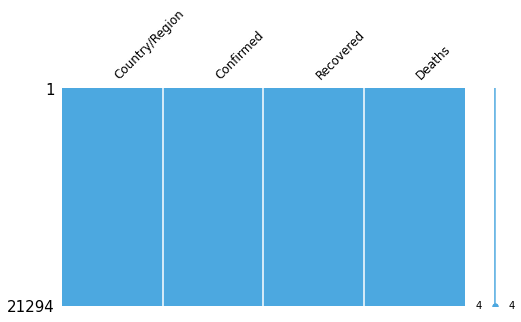

In [ ]:
#missing values analysis
msn.matrix(Covid_data, figsize=(8,4), fontsize=12, color=(0.30,0.66, 0.88))

Above figure showcase the absence of null values/missing values. Therefore, the data is clean and free from missing values or NaN values.

In [ ]:
#some statistical information about covid data
Covid_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21294 entries, 2020-02-15 to 2021-07-05
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country/Region  21294 non-null  object 
 1   Confirmed       21294 non-null  int64  
 2   Recovered       21294 non-null  float64
 3   Deaths          21294 non-null  int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 831.8+ KB


In [ ]:
#total cases in all countries; confirmed, deaths, recovered
TotalCases_data = Covid_data.groupby(by='Country/Region').sum()
TotalCases_data.style.background_gradient(cmap='Blues')

,Confirmed,Recovered,Deaths
Country/Region,,,
Argentina,660016831,578993611.000000,15347352
Brazil,3308592262,2891148713.000000,90932979
Colombia,658691299,602741749.000000,17624442
Czechia,299478294,268211986.000000,5107947
France,1069752090,84206426.000000,26816586
Germany,661868651,585984974.000000,16697379
India,4322796606,3947335749.000000,58317429
Indonesia,338885479,292376643.000000,9787902
Iran,514664467,426774875.000000,18798478


Above dataframe showcase the total count of cases; confirmed, recovered, and deaths in all countries taken into consideration.
* The darker cells are being dominant and representing the high number. This high number states that the recovery is maximum at India, Confirmed cases and deaths are maximum at USA.
* Data on average states that there are 1294 M cases confirmed, 726M recovered , and 32M deaths confirmed.

In [ ]:
#statistical description of top 20 affected countries dataset
TotalCases_data.describe()

,Confirmed,Recovered,Deaths
count,2.000000e+01,2.000000e+01,2.000000e+01
mean,1.294207e+09,7.265405e+08,3.248076e+07
std,1.736945e+09,9.648427e+08,3.389666e+07
min,2.994783e+08,2.905324e+06,5.107947e+06
25%,4.742769e+08,3.095441e+08,1.224204e+07
50%,6.609427e+08,4.306640e+08,2.042179e+07
75%,9.838982e+08,6.109849e+08,3.584360e+07
max,7.287919e+09,3.947336e+09,1.458225e+08


In [ ]:
#dataframe of Total covid cases in each country
countries_total_cases = TotalCases_data[['Confirmed']]
countries_total_cases = TotalCases_data.groupby(by=TotalCases_data.index)['Confirmed'].sum().sort_values(ascending=False).to_frame()
countries_total_cases.style.background_gradient(cmap='Blues')

,Confirmed
Country/Region,
US,7287919385
India,4322796606
Brazil,3308592262
Russia,1124232841
France,1069752090
United Kingdom,955280274
Turkey,816947133
Italy,793793932
Spain,787847149


Observing countries_total_cases dataset, it is clearly stated that USA confirmed maximum number of cases along with India. Czechia reported minimum number of confirmed covid cases among selected countries.

## **Exploratory Data Analysis**

#### **Total confirmed cases**

In [ ]:
# Plotting total confirmed cases in all 20 countries
Confirmed_plot = px.bar(data_frame = TotalCases_data, x=TotalCases_data.index, y='Confirmed', text='Confirmed',
                        labels=dict(x="Countries"),title='Total Confirmed Cases Analysis of all countries')
Confirmed_plot.update_layout(autosize=False, width=800, height=500,)
Confirmed_plot.update_traces(texttemplate='%{text:.2s}',textposition='outside', marker_color='teal')

This plot showcase the following observations: 

* Czechia is found to be the least affected among all the other countries.
*   top 3 countries with maximum confirmed cases in sequence are US, India, and Brazil, respectively. 
* Countries like France and Russia, Argentina, Colombia, and Germany are having similar number of confirmed covid cases. 

No country is found to with less confirmed cases that suggests the spread of this pandemic is dreadful and growing with pace.


#### **Total Death Cases**

In [ ]:
#data with Total deaths in each country
countries_total_deaths = TotalCases_data[['Deaths']]
countries_total_deaths = countries_total_deaths.groupby(by=TotalCases_data.index)['Deaths'].sum().sort_values(ascending=False).to_frame()
countries_total_deaths.style.background_gradient(cmap='Blues')

,Deaths
Country/Region,
US,145822514
Brazil,90932979
India,58317429
Mexico,51536228
Peru,42354160
United Kingdom,33673412
Italy,30701804
France,26816586
Russia,23047614


In [ ]:
# Plotting total deaths encountered in all 20 countries
Death_plot = px.bar(data_frame = TotalCases_data, x=TotalCases_data.index, y='Deaths', text='Deaths',
                        labels=dict(x="Countries"),title='Total Death Cases Analysis of all countries')
Death_plot.update_layout(autosize=False, width=800, height=500,)
Death_plot.update_traces(texttemplate='%{text:.2s}',textposition='outside', marker_color='darkslategrey')

###### This plot showcase tthe following observations:
The countries are extremely affected by covid and many countries have lost lives that can be clearly observed with the date cases found.
* US with maximum deaths, which are approximately 1.5 time greater than Brazil.
* Czechia has less cases and now it is having least deaths as well, among all.
* South Africa and Poland are having similar number of deaths but also more than 10 millions.

All the countries have crossed 1M of deaths count suggesting the severity of this virus.


Seeing the population of India, it can be considered as the country with all saftiness as much as possible, but also it has encountered more than 50 M of lives lost.

#### **Total Recovered Cases**

In [ ]:
#data with Total recovered in each country
countries_total_recovered = TotalCases_data[['Recovered']]
countries_total_recovered = countries_total_recovered.groupby(by=TotalCases_data.index)['Recovered'].sum().sort_values(ascending=False).to_frame()
countries_total_recovered.style.background_gradient(cmap='Blues')

,Recovered
Country/Region,
India,3947335749.000000
Brazil,2891148713.000000
Russia,968192682.000000
Turkey,757292170.000000
Italy,635714172.000000
Colombia,602741749.000000
Germany,585984974.000000
Argentina,578993611.000000
US,496971810.000000


In [ ]:
# Plotting total recoveries of all 20 countries
Recovered_plot = px.bar(data_frame = TotalCases_data, x=TotalCases_data.index, y='Recovered', text='Recovered',
                        labels=dict(x="Countries"),title='Total Recovered Cases Analysis of all countries')
Recovered_plot.update_layout(autosize=False, width=800, height=500,)
Recovered_plot.update_traces(texttemplate='%{text:.2s}',textposition='outside', marker_color='cadetblue')

This plot represents,
* India and Brazil are the countries which are recovering at a good pace in which India is far more better from other countries.
* Brazil has also recovered lives in a healthy way, chasing the pace of cases arised.
* UK is the country which has very less recovered cases in comparison to all, in contrast with death rate.
* Many countries have recovered almost more than 0.5 B of lives.


India is on the peak of recoveries, suggesting healthy measures taken by health workers and government. Also, people are supportive.


#### **Confirmed cases VS Recovered cases**

In [ ]:
#dataframe of recovered cases, reported, out of confirmed cases
countries_recovered_and_confirmed = TotalCases_data[['Confirmed', 'Recovered']]
countries_recovered_and_confirmed.style.background_gradient(cmap = 'Blues')

,Confirmed,Recovered
Country/Region,,
Argentina,660016831,578993611.000000
Brazil,3308592262,2891148713.000000
Colombia,658691299,602741749.000000
Czechia,299478294,268211986.000000
France,1069752090,84206426.000000
Germany,661868651,585984974.000000
India,4322796606,3947335749.000000
Indonesia,338885479,292376643.000000
Iran,514664467,426774875.000000


In [ ]:
# Comparing confirmed cases and recovered cases
Confirmed_recovered = go.Figure()
Confirmed_recovered.add_trace(go.Bar(x=TotalCases_data.index, y=TotalCases_data.Confirmed, text=TotalCases_data.Confirmed,
                                     marker_color='darkslategrey', name='Confirmed'))
Confirmed_recovered.add_trace(go.Bar(x=TotalCases_data.index, y=TotalCases_data.Recovered,
                marker_color='teal',  name='Recovered'))
Confirmed_recovered.update_layout(autosize=False, width=1000, height=500,  title_text='Confirmed Versus Recovered Cases')
Confirmed_recovered.update_traces(texttemplate='%{text:.2s}',textposition='outside')

Above analysis is done on the basis of confirmed cases and the recoveries with respect to the cases found.
* US with highest confirmed covud cases but the recovery rate is extremely worst among all.
* Including US, United Kingdom has also contributing in less recoveries; suggesting comparably less responsiveness.
* India and Brazil are balancing in both respected; Total cases confirmed and recoveries w.r.t that.
* Colombia, Argentina, Peru, and Indonesia have almost recovered more than a half of covid infected people.

US and United Kingdom are needed to be more attentive towards the recoveries, enhancing the treatment facilites and staff.
Moreover, US needs to be more attentive towards the social distancing measure.

In [ ]:
#Analysis through pie charts
from plotly.subplots import make_subplots
# fig = make_subplots(rows=2, cols=2)
pie_plots = make_subplots(rows=1, cols=3, specs=[[{"type": "pie"}, {"type": "pie"}, {"type": "pie"}]],
                          subplot_titles=['Confirmed', 'Deaths', 'Recovered'],horizontal_spacing=0.15)
pie_plots.add_trace(go.Pie(labels=TotalCases_data.index,values = TotalCases_data.Confirmed), row=1, col=1)
pie_plots.add_trace(go.Pie(labels=TotalCases_data.index,values = TotalCases_data.Deaths), row=1, col=2)
pie_plots.add_trace(go.Pie(labels=TotalCases_data.index, values = TotalCases_data.Recovered), row=1, col=3)

Summarizing the above analysis, 
* Out of all countries, US, India, and Brazil are found to be in a great chase.
* US and Brazil have suffered a lot in death rates suggesting lack of hospitality and staff. Moreover, no strict actions were taken. 
* Other countries are not much affected except United Kingdom. 
* The developed country like US has a very less recovery rate, conveying the imbalance in rise of cases vs recoveries. 
* Nature of cases spread the awareness of government to take strict actions, as not taken by US, on the covid.  

In [ ]:
#Creating scatterplot(line) figure
overview_plot = go.Figure()
colors=['teal', 'orange', 'red', 'lightgreen', 'purple', 'darkslategrey', 'cadetblue', 
        'crimson', 'lightsalmon', 'seagreen', 'blue', 'cornflowerblue', 
        'olive', 'olivedrab', 'tomato', 'slategrey', 'darkorchid', 'deeppink', 'darkmagenta', 'limegreen']
n=0
for col in TotalCases_data.columns.tolist():
  overview_plot.add_trace(go.Scatter(x=list(TotalCases_data.index), y=list(TotalCases_data[col]),
                                     mode='lines+markers',line=dict(color=colors[n]), name=col))
                                     
  n=n+1
 
#Setting title
overview_plot.update_layout(
    title_text="Overall cases analysis (Confirmed, Recovered, Deaths)"
)

overview_plot.show()

Observing above plot, comparison is within 20 topmost affected countries during covid pandemic.

* USA is the most affected country in all aspects of covid except the recovery rate.
* USA faced more than 7 billions of covid cases with approximately 0.4 million of people to death and approx. 
USA showed poor performance in recovery rate. First country with highest recoveries is India with less number of deaths compared to other countries in all aspects.
* France and Russia showed similar number of cases in deaths, active cases as well a in recovered cases. Total cases in these two countries are also found to be similar in number.
* France, UK, and Spain with lower recoveries.


#### **Day-wise confirmed cases analysis**

**Note**: *There is a slider below all plots to vary the date.*

In [ ]:
#Creating scatterplot(line) figure
Confirmed_plot_daywise = go.Figure()
colors=['teal', 'orange', 'lightgreen', 'purple', 'darkslategrey', 'cadetblue', 
        'crimson', 'lightsalmon', 'seagreen', 'blue', 'red', 'cornflowerblue', 
        'olive', 'olivedrab', 'tomato', 'slategrey', 'darkorchid', 'deeppink', 'darkmagenta', 'limegreen']
n=0
for name in Covid_data['Country/Region'].unique().tolist():
  Confirmed_plot_daywise.add_trace(go.Scatter(x=list(Covid_data[Covid_data['Country/Region']==name].index), y=list(Covid_data[Covid_data['Country/Region']==name].Confirmed), 
                                              mode='lines',line=dict(color=colors[n]), name=name))
  n=n+1
 
#Setting title
Confirmed_plot_daywise.update_layout(
    title_text="Confirmed cases analysis"
)

# Adding up range slider
Confirmed_plot_daywise.update_layout(xaxis=dict(rangeselector=dict(
                                    buttons=list([
                                        dict(count=1,
                                            label="1month",
                                            step="month",
                                            stepmode="backward"),
                                        dict(count=6,
                                            label="6months",
                                            step="month",
                                            stepmode="backward"),
                                        dict(count=1,
                                            label="YearToDate",
                                            step="year",
                                            stepmode="todate"),
                                        dict(count=1,
                                            label="1year",
                                            step="year",
                                            stepmode="backward"),
                                        dict(step="all")])),
                                        rangeslider=dict(visible=True),
                                        type="date")
                                    )
# displaying
Confirmed_plot_daywise.show()

#### Following outcomes:

* Observing confirmed cases, US started rising from the very beginning with no fall.
* India and Brazil started rising from Jul in the year 2020. These countries which got affected in the starting of covid period.
* Great rise of covid cases in the countries US and India is seen in the months of Jan and May in the year 2021 respectively.
* Country like columbia is showing a very constant line, this means the country was a bit safer than other.
* India is seen with a bigger jump to reach out above 30 M, a day.
* Cases in Brazil were seen increasing constantly day by day.
* Other countries have encountered less than 5 million per day in the end months of 2020 and constantly following the same.

The instant rise in cases in the year 2021, as seen in India and US, signifies the irreponsiveness of people and breaking the rules of safety measures.

#### **Day-wise death cases analysis**

In [ ]:
#Creating scatterplot(line) figure
Death_plot_daywise = go.Figure()
colors=['teal', 'orange', 'lightgreen', 'purple', 'darkslategrey', 'cadetblue', 
        'crimson', 'lightsalmon', 'seagreen', 'blue', 'red', 'cornflowerblue', 
        'olive', 'olivedrab', 'tomato', 'slategrey', 'darkorchid', 'deeppink', 'darkmagenta', 'limegreen']
n=0
for name in Covid_data['Country/Region'].unique().tolist():
  Death_plot_daywise.add_trace(go.Scatter(x=list(Covid_data[Covid_data['Country/Region']==name].index), y=list(Covid_data[Covid_data['Country/Region']==name].Deaths), 
                                              mode='lines',line=dict(color=colors[n]), name=name))
  n=n+1
 
#Setting title
Death_plot_daywise.update_layout(
    title_text="Death cases analysis"
)

# Adding up range slider
Death_plot_daywise.update_layout(xaxis=dict(rangeselector=dict(
                                    buttons=list([
                                        dict(count=1,
                                            label="1month",
                                            step="month",
                                            stepmode="backward"),
                                        dict(count=6,
                                            label="6months",
                                            step="month",
                                            stepmode="backward"),
                                        dict(count=1,
                                            label="YearToDate",
                                            step="year",
                                            stepmode="todate"),
                                        dict(count=1,
                                            label="1year",
                                            step="year",
                                            stepmode="backward"),
                                        dict(step="all")])),
                                        rangeslider=dict(visible=True),
                                        type="date")
                                    )

Death_plot_daywise.show()

### Following observations:

* Deaths due to covid were elevating in US at higher rate fron the very begining and maintained the pace till now.
* The plot of recovery on an average was falling but, here, the plot is bit dispersed dictating, there is a difference in death rate of countries whereas confirmed cases were showing little bit similarity.
* In the december period of 2020, the death cases in US started getting uplifted and doesn't fall back.
* Brazil shows the rise in deaths in the month of April 2021.
* India death rate is constant from the month october 2020 to april 2021 as the april passes the cases started increasing rapidly.
* Mexico is also seen on the increase in deaths but at slower rate.
* There is no country whose death count is falling. 

Increase in death rates suggests the lack of hospitality services in some countries and also the dreadfulness of coronavirus, day-by-day.

#### **Day-wise recovered cases analysis**

In [ ]:
#Creating scatterplot(line) figure
Recovered_plot_daywise = go.Figure()
colors=['teal', 'orange', 'lightgreen', 'purple', 'darkslategrey', 'cadetblue', 
        'crimson', 'lightsalmon', 'seagreen', 'blue', 'red', 'cornflowerblue', 
        'olive', 'olivedrab', 'tomato', 'slategrey', 'darkorchid', 'deeppink', 'darkmagenta', 'limegreen']
n=0
for name in Covid_data['Country/Region'].unique().tolist():
  Recovered_plot_daywise.add_trace(go.Scatter(x=list(Covid_data[Covid_data['Country/Region']==name].index), y=list(Covid_data[Covid_data['Country/Region']==name].Recovered), 
                                              mode='lines',line=dict(color=colors[n]), name=name))
  n=n+1
 
#Setting title
Recovered_plot_daywise.update_layout(
    title_text="Recovered cases analysis"
)

# Adding up range slider
Recovered_plot_daywise.update_layout(xaxis=dict(rangeselector=dict(
                                    buttons=list([
                                        dict(count=1,
                                            label="1month",
                                            step="month",
                                            stepmode="backward"),
                                        dict(count=6,
                                            label="6months",
                                            step="month",
                                            stepmode="backward"),
                                        dict(count=1,
                                            label="YearToDate",
                                            step="year",
                                            stepmode="todate"),
                                        dict(count=1,
                                            label="1year",
                                            step="year",
                                            stepmode="backward"),
                                        dict(step="all")])),
                                        rangeslider=dict(visible=True),
                                        type="date")
                                    )

Recovered_plot_daywise.show()

### Following Observations:
* The exceptional country in recovery is US as its recoveries were almost negligibe starting of 2021, seeing the rise of infected cases.
* India has shown the recoveries, outstandingly. Sudden ups are seen in november 2020 and may 2021 suggesting massive awareness and excellent staff and services.
* Another country which is good at recovery is Brazil, it has put good efforts in balancing the lives recovered and infected.
* Other 17 countries are on the average side of recovery requiring more attention in medication services and more awareness towards infections.



**KEY POINTS**

1. All the above observations suggest some more strict actions are 
required to be taken in countries like US, United Kingdom, France, and Spain to control the rise of deaths and pace up the recovery rate.

2. India and Brazil are needed to be more attentive towards the control of covid confirmed cases.

3. US needs to be very much responsive to control the rise of cases and must pace up the recoveries along with better treatment staff and facilities. Medication services are needed to be improvised.

4. Countries like Russia, Italy, Germany need to lower the curve of deaths and also elevate the recoveries so as to end the pandemic state. Turkey has to maintain the current pace of recoveries.


Out of all, US is found to be very much affected in all aspects; more than 30 millions of cases found each day(from November 2020 till now), Death rate is at its peak with almost 580K people mosing lives, a day. There is no pace up in recoveries.